# Problème de Classification

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import missingno as msno
import seaborn as sns
import numpy as np

from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer

## Regroupement en 4 DataFrame : un par sous groupe d'instance

In [2]:
#2113 : dépôt centré, position des clients totalement aléatoire
#2213 : dépôt centré, mais les clients forment plusieurs clusters, grappes géographiques.
#3113 : dépôt proche d'un coin de la carte, position des clients aléatoire
#3213 : dépôt proche d'un coin, mais les clients forment plusieurs clusters, grappes géographiques.

#Concatenement du 1er cluster d'instance
file_paths_2113 = glob.glob('HGS/2113/*.csv')

df_2113 = []
column_names = ["Instance", "Cout", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15", "S16", "S17", "S18"]
for file_path in file_paths_2113:
    df = pd.read_csv(file_path, names = column_names,sep =';')
    df_2113.append(df)

df_2113 = pd.concat(df_2113, ignore_index=True)


#Concatenement du 2eme cluster d'instance
file_paths_2213 = glob.glob('HGS/2213/*.csv')

df_2213 = []
column_names = ["Instance", "Cout", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15", "S16", "S17", "S18"]
for file_path in file_paths_2213:
    df = pd.read_csv(file_path, names = column_names,sep =';')
    df_2213.append(df)

df_2213 = pd.concat(df_2213, ignore_index=True)


#Concatenement du 3eme cluster d'instance
file_paths_3113 = glob.glob('HGS/3113/*.csv')

df_3113 = []
column_names = ["Instance", "Cout", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15", "S16", "S17", "S18"]
for file_path in file_paths_3113:
    df = pd.read_csv(file_path, names = column_names,sep =';')
    df_3113.append(df)

df_3113 = pd.concat(df_3113, ignore_index=True)


#Concatenement du 4eme cluster d'instance
file_paths_3213 = glob.glob('HGS/3213/*.csv')

df_3213 = []
column_names = ["Instance", "Cout", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15", "S16", "S17", "S18"]
for file_path in file_paths_3213:
    df = pd.read_csv(file_path, names = column_names,sep =';')
    df_3213.append(df)

df_3213 = pd.concat(df_3213, ignore_index=True)

In [3]:
df_2113

,Instance,Cout,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,XML100_2113_01,13063,257.768,105.0410,0.2078,0.0803,534.200,133.2030,0,294.400,0.2274,0.1524,446.500,0.2066,0.1033,0.0207,327.901,482.077,1.6125,3.5971
1,XML100_2113_01,13237,201.777,57.7145,0.1561,0.0349,576.700,74.8466,0,302.600,0.2275,0.1691,420.300,0.2113,0.1057,0.0321,187.524,489.225,1.7889,4.1107
2,XML100_2113_01,13168,225.720,114.3020,0.1653,0.0572,552.800,112.2280,0,279.400,0.2105,0.1649,430.800,0.2062,0.1031,0.0202,307.325,484.538,1.5492,3.7572
3,XML100_2113_01,13168,243.308,164.7820,0.2140,0.1242,539.600,157.2250,0,297.600,0.2452,0.1512,432.200,0.3636,0.1818,0.2727,403.127,467.493,3.0000,3.5150
4,XML100_2113_01,13000,195.334,102.7790,0.1588,0.1049,563.700,79.7384,0,294.200,0.2256,0.1720,416.400,0.2074,0.1037,0.0233,213.558,490.165,1.6125,3.9475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536717,XML100_2113_27,14194,218.117,110.4410,0.1915,0.1189,494.417,159.4680,0,311.250,0.2732,0.1383,471.417,0.3704,0.1852,0.2457,375.874,458.019,2.2111,3.1771
2536718,XML100_2113_27,14194,221.218,101.5390,0.2062,0.1496,497.833,162.3850,0,285.250,0.2557,0.1466,449.000,0.3704,0.1852,0.2457,376.398,460.447,2.2111,3.3854
2536719,XML100_2113_27,14194,228.585,73.4839,0.2221,0.1512,491.083,141.6930,0,331.083,0.2838,0.1316,553.917,0.2486,0.1243,0.0275,321.975,471.448,1.3123,2.5437
2536720,XML100_2113_27,14194,216.398,87.3315,0.2046,0.0854,503.833,138.0870,0,333.167,0.2779,0.1564,507.917,0.2530,0.1265,0.0384,325.866,466.135,1.4337,3.0660


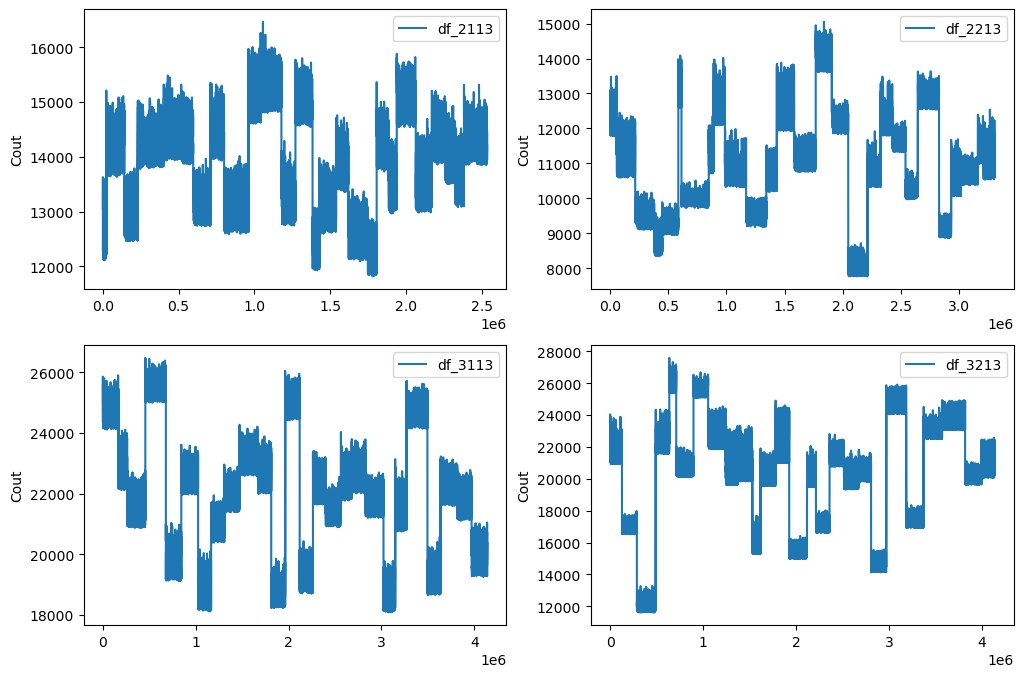

In [150]:
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
df_2113['Cout'].plot()
plt.legend(["df_2113"])
plt.ylabel("Cout")

plt.subplot(2,2,2)
df_2213['Cout'].plot()
plt.legend(["df_2213"])
plt.ylabel("Cout")

plt.subplot(2,2,3)
df_3113['Cout'].plot()
plt.legend(["df_3113"])
plt.ylabel("Cout")

plt.subplot(2,2,4)
df_3213['Cout'].plot()
plt.legend(["df_3213"])
plt.ylabel("Cout")

plt.show()

Dans l'observation des données, on constate une grande variabilité des prix, même au sein des sous-groupes. Il devient nécessaire de subdiviser le problème global en plusieurs sous-problèmes, car il est difficile de définir de manière générale la qualité d'une solution. En effet, le graphique ci-dessus révèle que, selon l'instance spécifique du problème, les solutions optimales peuvent avoir des coûts très différents.

# Etude de df_2113

In [152]:
def initClasses3(df):   # initialise les tranches de cout qui permetteront de former les classes 
    
    instances=df["Instance"].unique()

    
    quantiles = df.iloc[:,:2].groupby(["Instance"]).quantile([0,0.02,0.24,0.26,0.49,0.51,0.74,0.76,0.98,1]).unstack()  
    
    # Le .iloc permet de garde uniquement le cout et le nom de l'instance
    # Le fait de grouper par instance permet de s'assurer que l'on garde des solutions pour chacune des instances

    # On forme 5 groupes de solutions rassemblant au total 10% de l'ensemble des données
    # les groupes sont compris entres 2 quantiles consécutifs
    
    classes={}
    
    for i in instances:
        
        classe=[]
        
        for k in range(5):
        
            classe.append((quantiles.loc[i][2*k],(quantiles.loc[i][2*k+1])))  # les valeurs entre les deux quantiles seront conservées dans la classe k
        
        classes[i]=classe
    
    
    return classes

In [153]:
def étiquetage2(df,Classes):   # associe une étiquette à une solution en fonction de son cout
    etiquettes=[]
    
    for index in range(len(df)):
        route=df.iloc[index]
        c=Classes[route['Instance']]
        cout=route['Cout']
        
        etiquette=0
        
        while etiquette<5 and (cout<c[etiquette][0] or cout>c[etiquette][1]):
            
            etiquette+=1

        etiquettes.append(etiquette)    
      
    # si le cout n'appartient à aucune des tranches, la solution sera placée dans le groupe 6, destiné à être supprimé
    # cela nous permet de réduire considérablement le nombre de lignes du dataset
    
    return etiquettes
      

In [58]:
c=initClasses3(df_2113)

In [59]:
c

{'XML100_2113_01': [(12113.0, 12226.0),
  (12392.0, 12401.0),
  (12503.0, 12512.0),
  (12622.0, 12632.0),
  (12987.0, 13628.0)],
 'XML100_2113_02': [(13633.0, 13783.0),
  (13975.0, 13989.0),
  (14133.0, 14143.0),
  (14248.0, 14257.0),
  (14485.0, 15211.0)],
 'XML100_2113_03': [(12459.0, 12627.0),
  (12772.0, 12780.0),
  (12877.0, 12886.0),
  (13035.0, 13052.0),
  (13329.0, 13867.0)],
 'XML100_2113_04': [(13776.0, 13903.0),
  (14019.0, 14026.0),
  (14097.0, 14103.0),
  (14179.0, 14187.0),
  (14426.0, 15070.0)],
 'XML100_2113_05': [(13932.0, 14041.0),
  (14195.0, 14207.0),
  (14342.0, 14353.84),
  (14525.0, 14542.0),
  (14885.0, 15486.0)],
 'XML100_2113_06': [(13939.0, 14052.0),
  (14183.0, 14192.0),
  (14283.0, 14291.0),
  (14416.0, 14431.0),
  (14746.0, 15451.0)],
 'XML100_2113_07': [(13861.0, 14028.0),
  (14159.0, 14166.0),
  (14243.0, 14249.0),
  (14337.0, 14346.0),
  (14629.0, 15209.0)],
 'XML100_2113_08': [(12733.0, 12846.0),
  (12966.0, 12973.0),
  (13055.0, 13062.0),
  (13158.0, 

In [60]:
e=étiquetage2(df_2113,c)

In [72]:
print(e.count(5))
print(e.count(4))
print(e.count(3))
print(e.count(2))
print(e.count(1))
print(e.count(0))

2265553
51071
55666
56358
56618
51456


In [73]:
classif_2113=df_2113.drop(columns=['Instance','Cout']).copy()

In [74]:
classif_2113

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,257.768,105.0410,0.2078,0.0803,534.200,133.2030,0,294.400,0.2274,0.1524,446.500,0.2066,0.1033,0.0207,327.901,482.077,1.6125,3.5971
1,201.777,57.7145,0.1561,0.0349,576.700,74.8466,0,302.600,0.2275,0.1691,420.300,0.2113,0.1057,0.0321,187.524,489.225,1.7889,4.1107
2,225.720,114.3020,0.1653,0.0572,552.800,112.2280,0,279.400,0.2105,0.1649,430.800,0.2062,0.1031,0.0202,307.325,484.538,1.5492,3.7572
3,243.308,164.7820,0.2140,0.1242,539.600,157.2250,0,297.600,0.2452,0.1512,432.200,0.3636,0.1818,0.2727,403.127,467.493,3.0000,3.5150
4,195.334,102.7790,0.1588,0.1049,563.700,79.7384,0,294.200,0.2256,0.1720,416.400,0.2074,0.1037,0.0233,213.558,490.165,1.6125,3.9475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536717,218.117,110.4410,0.1915,0.1189,494.417,159.4680,0,311.250,0.2732,0.1383,471.417,0.3704,0.1852,0.2457,375.874,458.019,2.2111,3.1771
2536718,221.218,101.5390,0.2062,0.1496,497.833,162.3850,0,285.250,0.2557,0.1466,449.000,0.3704,0.1852,0.2457,376.398,460.447,2.2111,3.3854
2536719,228.585,73.4839,0.2221,0.1512,491.083,141.6930,0,331.083,0.2838,0.1316,553.917,0.2486,0.1243,0.0275,321.975,471.448,1.3123,2.5437
2536720,216.398,87.3315,0.2046,0.0854,503.833,138.0870,0,333.167,0.2779,0.1564,507.917,0.2530,0.1265,0.0384,325.866,466.135,1.4337,3.0660


In [75]:
classif_2113['Qualité']=e

In [76]:
len(classif_2113)

2536722

In [77]:
classif_2113=classif_2113[classif_2113['Qualité']!=5]

In [78]:
len(classif_2113)

271169

# Features selection par Backward elimination & Forward selection

J'ai tenté de maximiser le recall de la classe 0, i.e de faire en sorte que toute solution potentiellement très bonne soit identifiée. Cela aurait permi de mieux comprendre quels sont les paramètres à prendre en compte pour former une bonne solution.

Cependant, l'optimistion du recall de la classe 0 n'a pas permis de retirer des features. J'ai donc réessayé avec le recall général.

In [94]:
X = classif_2113.drop('Qualité', axis=1)  # Features
y = classif_2113['Qualité']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Étape 1 : Entraîner un modèle de random forest initial
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)

# Étape 2 : Obtenir les scores d'importance des caractéristiques
importances_caracteristiques = rf_model.feature_importances_

# Étape 3 : Trier les caractéristiques par importance
caracteristiques_triees = sorted(zip(importances_caracteristiques, X_train.columns), reverse=False)
print(caracteristiques_triees)
# Étape 4 : Suppression itérative

recall_precedent=0

for i in range(len(caracteristiques_triees)):
    caracteristiques_a_garder = [caracteristique[1] for caracteristique in caracteristiques_triees[i:]]
    X_train_subset = X_train[caracteristiques_a_garder]
    X_test_subset = X_test[caracteristiques_a_garder]
    # Retraîner le modèle
    rf_model.fit(X_train_subset, y_train)

    # Évaluer la performance du modèle (utilisez votre ensemble de validation ou la validation croisée)
    y_pred = rf_model.predict(X_test_subset)
    
    #recall_class_0 = recall_score(y_test, y_pred, labels=[0], average=None)[0]     
    ###### pas d'amélioration, supprime juste s7
    
    micro_recall = recall_score(y_test, y_pred, average='micro')
    
    # Surveiller et arrêter en fonction de votre critère défini
    if micro_recall < recall_precedent:
        break
    else: recall_precedent=micro_recall
    print(recall_precedent,caracteristiques_a_garder)

[(0.0, 'S7'), (0.02455376635633841, 'S14'), (0.027219675599406128, 'S13'), (0.027808480991401072, 'S12'), (0.028645584890729044, 'S17'), (0.04502721970156726, 'S9'), (0.046991012206252174, 'S10'), (0.05413846551022745, 'S8'), (0.054500968394432275, 'S2'), (0.05728839703034802, 'S11'), (0.0606909378881041, 'S15'), (0.06264676596381846, 'S4'), (0.06656110756779347, 'S3'), (0.07595340820371894, 'S16'), (0.08669098652501038, 'S6'), (0.09291378118523935, 'S5'), (0.09345714537544207, 'S18'), (0.09491229661017152, 'S1')]
0.7732234391709998 ['S7', 'S14', 'S13', 'S12', 'S17', 'S9', 'S10', 'S8', 'S2', 'S11', 'S15', 'S4', 'S3', 'S16', 'S6', 'S5', 'S18', 'S1']
0.7765608290002581 ['S14', 'S13', 'S12', 'S17', 'S9', 'S10', 'S8', 'S2', 'S11', 'S15', 'S4', 'S3', 'S16', 'S6', 'S5', 'S18', 'S1']
0.7781281115167608 ['S13', 'S12', 'S17', 'S9', 'S10', 'S8', 'S2', 'S11', 'S15', 'S4', 'S3', 'S16', 'S6', 'S5', 'S18', 'S1']


In [98]:



# Étape 1 : Entraîner un modèle de forêt aléatoire initial
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)

# Étape 2 : Obtenir les scores d'importance des caractéristiques
importances_caracteristiques = rf_model.feature_importances_

# Étape 3 : Trier les caractéristiques par importance (en ordre croissant cette fois)
caracteristiques_triees = sorted(zip(importances_caracteristiques, X_train.columns), reverse=True) # dans l'autre sens

# Étape 4 : Ajout itératif
recall_precedent = 0

for i in range(4,len(caracteristiques_triees)):
    caracteristiques_a_garder = [caracteristique[1] for caracteristique in caracteristiques_triees[:i+1]] # attention on augmente ici progressivement le nombre de variables
    X_train_subset = X_train[caracteristiques_a_garder]
    X_test_subset = X_test[caracteristiques_a_garder]
    
    # Retraîner le modèle
    rf_model.fit(X_train_subset, y_train)

    # Prédire sur l'ensemble de test
    y_pred = rf_model.predict(X_test_subset)
    
    # Calculer le rappel (recall) micro-average
    micro_recall = recall_score(y_test, y_pred, average='micro')
    
    # Surveiller et arrêter en fonction de votre critère défini
    if micro_recall < recall_precedent:
        break
    else:
        recall_precedent = micro_recall
    print(recall_precedent, caracteristiques_a_garder)


0.7098314710329313 ['S18', 'S1', 'S5', 'S6', 'S16']
0.7238263819744072 ['S18', 'S1', 'S5', 'S6', 'S16', 'S3']
0.7347604823542427 ['S18', 'S1', 'S5', 'S6', 'S16', 'S3', 'S4']
0.7461002323265848 ['S18', 'S1', 'S5', 'S6', 'S16', 'S3', 'S4', 'S15']
0.7685953460928568 ['S18', 'S1', 'S5', 'S6', 'S16', 'S3', 'S4', 'S15', 'S11']


In [115]:
X=classif_2113[['S18', 'S1', 'S5', 'S6', 'S16', 'S3', 'S4', 'S15', 'S11']]
y=classif_2113['Qualité']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
y_pred = rf_classifier.predict(X_test)

In [119]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Display confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.7878268245012354
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     10225
           1       0.72      0.79      0.75     11420
           2       0.65      0.60      0.62     11279
           3       0.74      0.70      0.72     11126
           4       0.93      0.91      0.92     10184

    accuracy                           0.79     54234
   macro avg       0.79      0.79      0.79     54234
weighted avg       0.79      0.79      0.79     54234

Confusion Matrix:
 [[9875  324   16    1    9]
 [ 673 9008 1496  202   41]
 [ 101 2576 6722 1796   84]
 [  22  614 2100 7823  567]
 [  26   63   86  710 9299]]


In [120]:
light_2113=classif_2113[classif_2113['Qualité'].isin([0,2,4])]

In [121]:
X2=light_2113[['S18', 'S1', 'S5', 'S6', 'S16', 'S3', 'S4', 'S15', 'S11']]
y2=light_2113['Qualité']

In [127]:
print(y2)

0          4
1          4
2          4
3          4
4          4
          ..
2536717    2
2536718    2
2536719    2
2536720    2
2536721    2
Name: Qualité, Length: 158885, dtype: int64


In [122]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [123]:
# Initialize the Random Forest Classifier
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf_classifier2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [128]:
y_pred2 = rf_classifier2.predict(X_test2)

In [129]:
# Evaluate accuracy
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy2}')

# Display classification report
print('Classification Report:\n', classification_report(y_test2, y_pred2))

# Display confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test2, y_pred2))

Accuracy: 0.9626774081883123
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     10159
           2       0.95      0.95      0.95     11312
           4       0.97      0.96      0.97     10306

    accuracy                           0.96     31777
   macro avg       0.96      0.96      0.96     31777
weighted avg       0.96      0.96      0.96     31777

Confusion Matrix:
 [[ 9966   172    21]
 [  306 10774   232]
 [   44   411  9851]]


On obtient d'excellent résultats
Mais comment le model agit-il sur les solutions qualifiées de "moyennement bonnes" et "moyennement mauvaises" ?

In [136]:
medium_2113=classif_2113[classif_2113['Qualité'].isin([1,3])]

In [137]:
len(medium_2113)

112284

In [138]:
pred_medium=rf_classifier2.predict(medium_2113[['S18', 'S1', 'S5', 'S6', 'S16', 'S3', 'S4', 'S15', 'S11']])

In [139]:
medium_y=medium_2113['Qualité']+1   #on voudrait que l'algorithme classe les solutions "moyennes" vers les solutions mauvaises plutot que vers les bonnes solutions d'où le "+1" 

In [143]:
# Display confusion matrix
print('Confusion Matrix:\n', confusion_matrix(medium_y,pred_medium))

Confusion Matrix:
 [[    0     0     0]
 [11535 44257   826]
 [  319 41157 14190]]


Nous allons maintenant esssayer d'améliorer le recall de la classe 0 car le 2% des couts devrait absolutment etre considéré comme de bonnes solutions. Idem pour le top 2% des plus mauvaises.
Nous allons pour cela utiliser GridSearchCV

In [145]:
#On utilise les données light définies plus tôt

# Définir le modèle
model = RandomForestClassifier()

# Définir les hyperparamètres à optimiser
n_estimators = [60,80,100]
max_depth = [2, 3, 5]
bootstrap = [True, False]

param_grid = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth, 
    'bootstrap': bootstrap
}

# Définir la fonction de score (F1 pour les classes spécifiques)
Recall_scorer = make_scorer(recall_score, labels=[0, 4], average='micro')

# Créer l'objet GridSearchCV

# NE PAS RUN
#########grid_search = GridSearchCV(model, param_grid, cv=5, scoring=Recall_scorer)

# Exécuter la recherche par grille sur les données d'entraînement
grid_search.fit(X_train2, y_train2)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Évaluer le modèle sur les données de test
y_pred3 = grid_search.best_estimator_.predict(X_test2)


Meilleurs hyperparamètres : {'bootstrap': True, 'max_depth': 5, 'n_estimators': 100}


In [146]:
# Evaluate accuracy
accuracy3 = accuracy_score(y_test2, y_pred3)
print(f'Accuracy: {accuracy3}')

# Display classification report
print('Classification Report:\n', classification_report(y_test2, y_pred3))

# Display confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test2, y_pred3))

Accuracy: 0.7273185008024672
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77     10159
           2       0.67      0.63      0.65     11312
           4       0.74      0.80      0.77     10306

    accuracy                           0.73     31777
   macro avg       0.73      0.73      0.73     31777
weighted avg       0.73      0.73      0.73     31777

Confusion Matrix:
 [[7698 1604  857]
 [2105 7169 2038]
 [ 141 1920 8245]]


In [164]:
def forward(X_train,X_test,y_train,y_test):



    # Étape 1 : Entraîner un modèle de forêt aléatoire initial
    rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
    rf_model.fit(X_train, y_train)

    # Étape 2 : Obtenir les scores d'importance des caractéristiques
    importances_caracteristiques = rf_model.feature_importances_

    # Étape 3 : Trier les caractéristiques par importance (en ordre croissant cette fois)
    caracteristiques_triees = sorted(zip(importances_caracteristiques, X_train.columns), reverse=True) # dans l'autre sens

    # Étape 4 : Ajout itératif
    recall_precedent = 0
    carac=[""]
    for i in range(4,len(caracteristiques_triees)):
        caracteristiques_a_garder = [caracteristique[1] for caracteristique in caracteristiques_triees[:i+1]] # attention on augmente ici progressivement le nombre de variables
        X_train_subset = X_train[caracteristiques_a_garder]
        X_test_subset = X_test[caracteristiques_a_garder]

        # Retraîner le modèle
        rf_model.fit(X_train_subset, y_train)

        # Prédire sur l'ensemble de test
        y_pred = rf_model.predict(X_test_subset)

        # Calculer le rappel (recall) micro-average
        micro_recall = recall_score(y_test, y_pred, average='micro')

        # Surveiller et arrêter en fonction de votre critère défini
        if micro_recall < recall_precedent:
            break
        else:
            recall_precedent = micro_recall
            carac=caracteristiques_a_garder
    return(carac)


## Comparaison des caractéristiques des solution des 4 sous-groupe d’instances

In [168]:
data=[df_2213,df_3113,df_3213]

for df in data:
    
    print("-------------------------------------------")
    classes=initClasses3(df)
    etiquettes=étiquetage2(df,classes)
    
    classif_df=df.drop(columns=['Instance','Cout']).copy()
    classif_df['Qualité']=etiquettes
    classif_df=classif_df[classif_df['Qualité'].isin([0,2,4])]   # on ne garde que trois classes comme vu précédemment

    
    X = classif_df.drop('Qualité', axis=1)  # Features
    y = classif_df['Qualité']               # Target variable
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    carac=forward(X_train,X_test,y_train,y_test)
    
    print("caractéristiques importantes "+str(carac))
    
    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier on the training set
    rf_classifier.fit(X_train[carac], y_train)
    
    y_pred = rf_classifier.predict(X_test[carac])
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Display classification report
    print('Classification Report:\n', classification_report(y_test, y_pred))

    # Display confusion matrix
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


-------------------------------------------
caractéristiques importantes ['S18', 'S16', 'S5', 'S6', 'S4', 'S17']
Accuracy: 0.9813505268996118
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     13703
           2       0.98      0.97      0.98     16216
           4       0.99      0.98      0.99     13353

    accuracy                           0.98     43272
   macro avg       0.98      0.98      0.98     43272
weighted avg       0.98      0.98      0.98     43272

Confusion Matrix:
 [[13605    98     0]
 [  378 15745    93]
 [    0   238 13115]]
-------------------------------------------
caractéristiques importantes ['S18', 'S5', 'S16', 'S6', 'S10', 'S11', 'S15', 'S12', 'S1', 'S4']
Accuracy: 0.9713744515530471
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     16730
           2       0.96      0.96      0.96     18420
           4  